# WITH PANDAS AND MATPLOTLIB

In [30]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [5]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [7]:
df.shape

(2535, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [9]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

## 1: Plot number of people by gender

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
df.groupby("gender").count()

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,107,107,107,107,107,104,98,107,107,107,107,104,107
M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428


In [11]:
gender = df["gender"].value_counts()
gender

M    2428
F     107
Name: gender, dtype: int64

In [12]:
df["gender"].value_counts()["M"]

2428

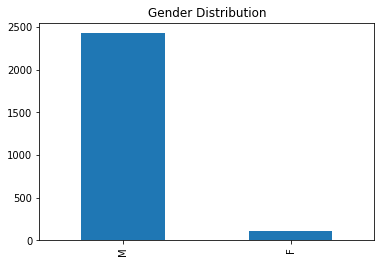

In [13]:
gender.plot(kind="bar", title = "Gender Distribution");

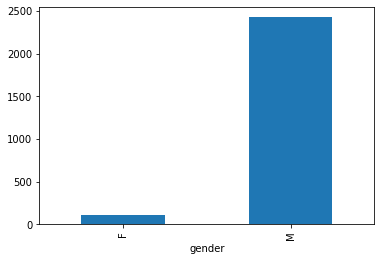

In [14]:
df.groupby("gender")["gender"].count().plot.bar();

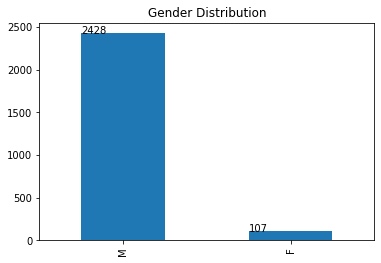

In [15]:
ax = gender.plot(kind='bar', title = "Gender Distribution")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

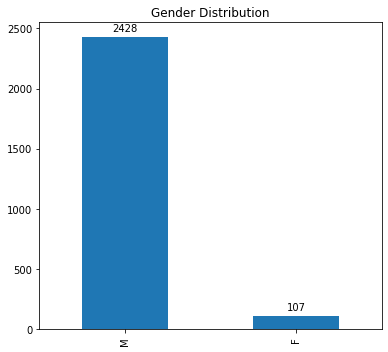

In [16]:
splot = gender.plot(kind='bar', figsize = (5.5, 5), title = 'Gender Distribution')
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout();

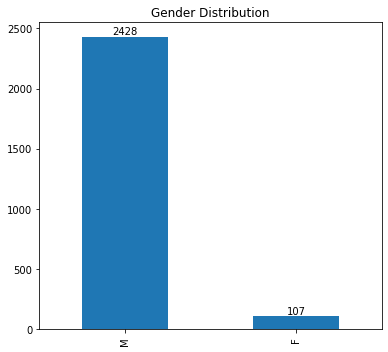

In [24]:
ax = gender.plot(kind='bar', title = "Gender Distribution", figsize = (5.5, 5))
for index, data in enumerate(gender):
    ax.text(x=index, y =data+20, s=f"{data}", horizontalalignment='center')

plt.tight_layout();

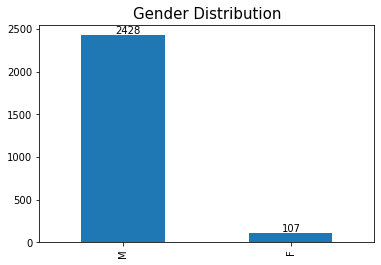

In [ ]:
# with pandas



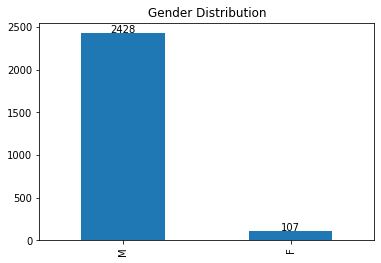

In [ ]:
ax = gender.plot(kind='bar', title = "Gender Distribution")
for index, data in enumerate(gender):
    ax.text(x=index, y =data+1, s=f"{data}", horizontalalignment='center')

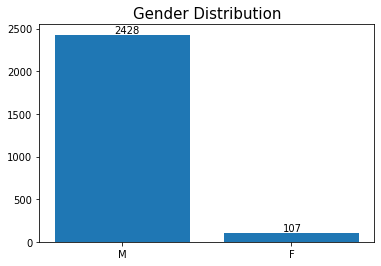

In [ ]:
# with matplotlib


In [25]:
x = df.gender.value_counts().index
print(x)
y = df.gender.value_counts().values
print(y)

Index(['M', 'F'], dtype='object')
[2428  107]


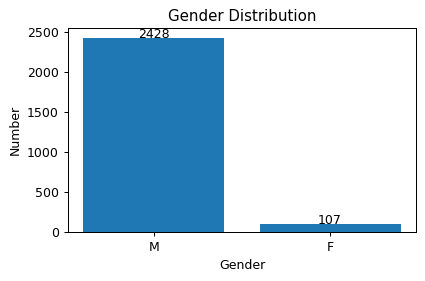

In [ ]:
plt.figure(figsize=(5,3), dpi=90)
plt.bar(x, y)
plt.xlabel("Gender")
plt.ylabel("Number")
plt.title("Gender Distribution")

for index, value in enumerate(y):
  plt.text(index, value, str(value), horizontalalignment='center')

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(x, y)
# plt.show()

# for index, value in enumerate(y):
#   plt.text(index, value, str(value), horizontalalignment='center')

## 2: Plot 7 most common kill weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [45]:
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [ ]:
df["armed"].value_counts()[:7]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [ ]:
df["armed"].value_counts().nlargest(n=7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

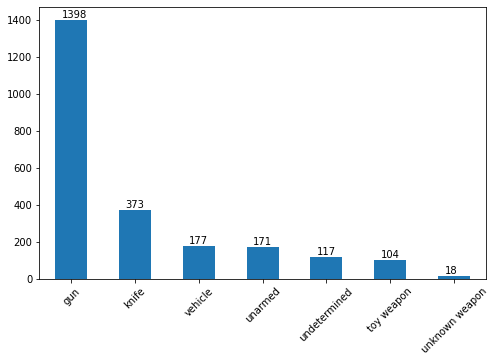

In [ ]:
# with pandas


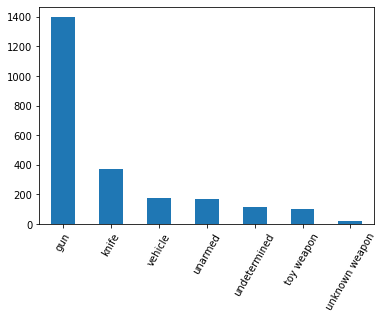

In [ ]:
df["armed"].value_counts().nlargest(n=7).plot.bar()
plt.xticks(rotation = 60);

In [ ]:
x = df.armed.value_counts()[:7].index
print(x)
y = df.armed.value_counts()[:7].values
print(y)

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')
[1398  373  177  171  117  104   18]


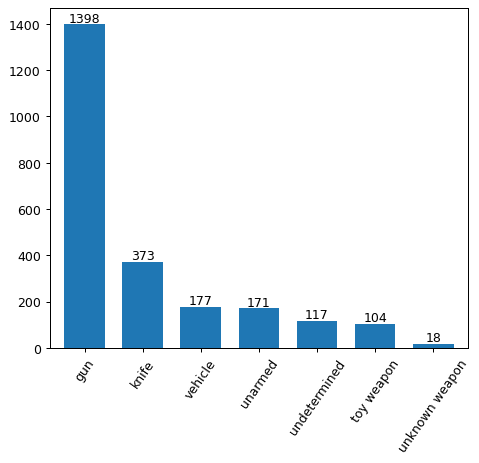

In [ ]:
plt.figure(figsize=(6,5), dpi=90)
df["armed"].value_counts().nlargest(n=7).plot.bar(width=0.7)
plt.xticks(rotation = 55);
for index, value in enumerate(y):
  plt.text(index, value+10, str(value), horizontalalignment='center')

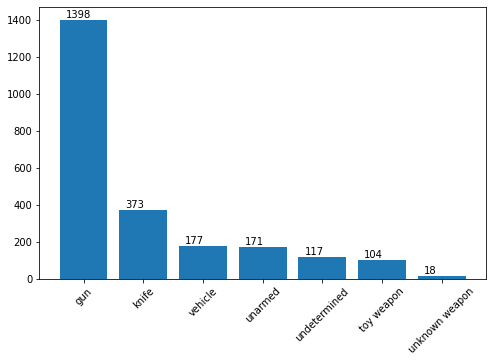

In [ ]:
# with matplotlib


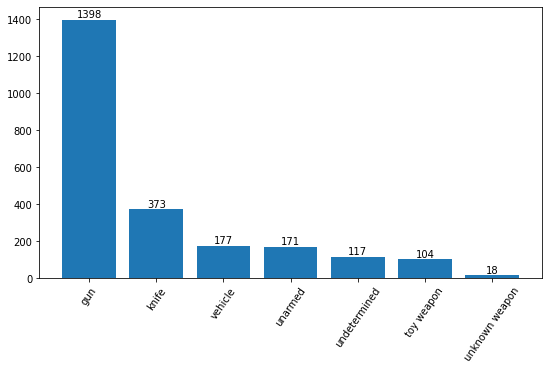

In [ ]:
fig, ax = plt.subplots(figsize= (9,5))
ax.bar(x, y)
plt.xticks(rotation = 55)
for index, value in enumerate(y):
  plt.text(index, value+10, str(value), horizontalalignment='center');

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


above25    1905
below25     630
Name: age_cat, dtype: int64

In [ ]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
below25 = df[df["age"] <= 25]
below25.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
627,756,Raul Herrera,20/08/15,shot,gun,17.0,M,H,Ontario,CA,True,attack,Not fleeing,False
2187,2440,Desmond Phillips,17/03/17,shot and Tasered,knife,25.0,M,B,Chico,CA,True,other,Not fleeing,False
2005,2241,Elijah Smith,19/01/17,shot and Tasered,knife,25.0,M,W,Florissant,MO,True,attack,Not fleeing,False
556,680,Zachary Hammond,26/07/15,shot,vehicle,19.0,M,W,Seneca,SC,False,other,Other,False
465,587,Kevin Lamont Judson,01/07/15,shot,vehicle,24.0,M,B,McMinnville,OR,False,attack,Foot,False


In [ ]:
above25 = df[df["age"] > 25]
above25.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1148,1312,Luke Miller,25/02/16,shot,gun,37.0,M,W,Evans,CO,False,attack,Foot,True
1497,1679,William Tracy Patterson,04/07/16,shot,gun,34.0,M,W,North Charleston,SC,False,attack,Not fleeing,True
2168,2412,Michael Anthony Perez,12/03/17,shot and Tasered,knife,33.0,M,H,Orange,CA,True,other,Not fleeing,False
1171,1339,Philip Vitullo,07/03/16,shot,gun,49.0,M,W,Rochester,NY,True,attack,Not fleeing,False
1595,1784,Perry Lee Heitman,13/08/16,shot,gun,53.0,M,W,Lakewood,CO,False,other,Not fleeing,False


In [ ]:
below25["age"].count()

553

In [ ]:
above25["age"].count()

1905

In [ ]:
df.age.value_counts().sum()

2458

In [ ]:
below25.age = "below25"

In [ ]:
above25.age = "above25"

In [ ]:
grouped_age = below25['age'].append(above25['age'])

In [ ]:
df['grouped_age'] = grouped_age

In [ ]:
# below25 = df[df["age"] <= 25].count().id.sum()
# above25 = df[df["age"] > 25].count().id.sum()

In [ ]:
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,grouped_age
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25


In [ ]:
# df[df["grouped_age"] <= 25] = 'below25' 

In [ ]:
# df[df["grouped_age"] > 25] = 'above25'

In [ ]:
df['grouped_age'].value_counts()

above25    1905
below25     553
Name: grouped_age, dtype: int64

In [ ]:
# df3 = pd.concat([below25, above25])
# df3

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
10,19,Patrick Wetter,06/01/15,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.0,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


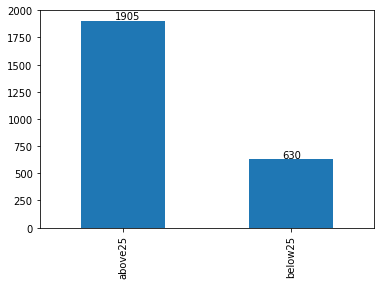

In [ ]:
# with pandas


In [ ]:
x = df['grouped_age'].value_counts().index
print(x)
y = df['grouped_age'].value_counts().values
print(y)

Index(['above25', 'below25'], dtype='object')
[1905  553]


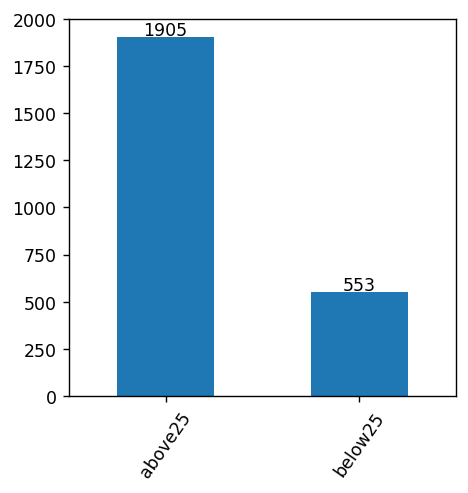

In [ ]:
plt.figure(figsize=(4,4), dpi=125)
df["grouped_age"].value_counts().plot.bar(width=0.5)
plt.xticks(rotation = 55);
for index, value in enumerate(y):
  plt.text(index, value+10, str(value), horizontalalignment='center')

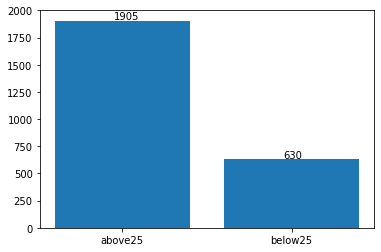

In [ ]:
# with matplotlib


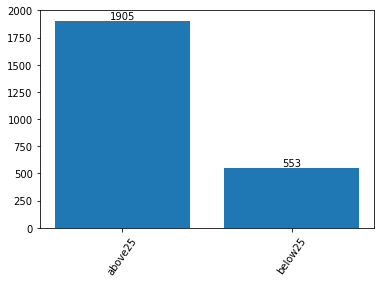

In [ ]:
fig, ax = plt.subplots(figsize= (6,4))
ax.bar(x, y, width=0.8)
plt.xticks(rotation = 55)
for index, value in enumerate(y):
  plt.text(index, value+10, str(value), horizontalalignment='center');

## 4: Plot number of killed poeple by race

In [ ]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_catogoric,age_categoric
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25


In [ ]:
df['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

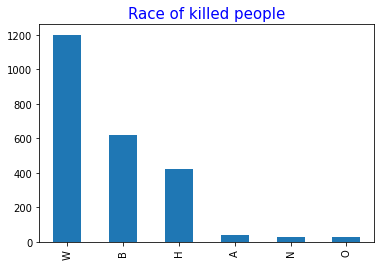

In [ ]:
# with pandas


In [ ]:
x = df['race'].value_counts().index
print(x)
y = df['race'].value_counts().values
print(y)

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')
[1201  618  423   39   31   28]


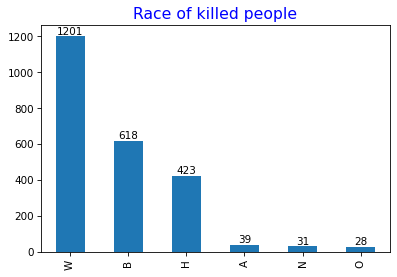

In [ ]:
plt.figure(figsize=(6,4), dpi=75)
df["race"].value_counts().plot.bar(width=0.5)
plt.title("Race of killed people", fontsize= 15, color="blue")
plt.xticks(rotation = 90);
for index, value in enumerate(y):
  plt.text(index, value+10, str(value), horizontalalignment='center')

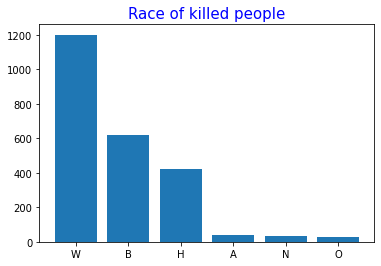

In [ ]:
# with matplotlib


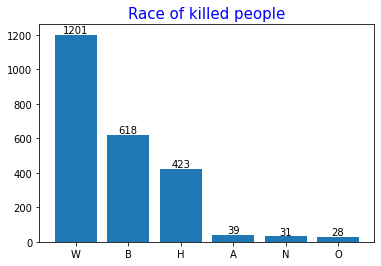

In [ ]:
fig, ax = plt.subplots(figsize= (6,4))
ax.bar(x, y, width=0.8)
plt.title("Race of killed people", fontsize= 15, color="blue")
plt.xticks(rotation = 0)
for index, value in enumerate(y):
  plt.text(index, value+10, str(value), horizontalalignment='center');

## 5: Killed People According to Races (Pie Chart)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

In [ ]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,grouped_age
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
df["race"].dtype

dtype('O')

In [ ]:
df['race'].value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [ ]:
df['race'].value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [ ]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
df['race'].count()

2340

In [ ]:
df.shape

(2535, 15)

In [ ]:
df["race"].isnull().sum()

195

In [ ]:
# df['race'] = df['race'].astype('str')

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

(2254, 15)

In [ ]:
df.shape

(2535, 15)

In [ ]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
grouped_age                 77
dtype: int64

In [ ]:
df.dropna(subset=['race'], axis= 0, inplace=True)
df.dropna(subset=['age'], axis= 0, inplace=True)
df.dropna(subset=['flee'], axis= 0, inplace=True)
df.dropna(subset=['armed'], axis= 0, inplace=True)

In [ ]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
grouped_age                0
dtype: int64

In [ ]:
df.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [ ]:
df['race'].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [ ]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

array([1168,  592,  401,   36,   29,   28])

In [ ]:
df['race'].value_counts().values

array([1168,  592,  401,   36,   29,   28])

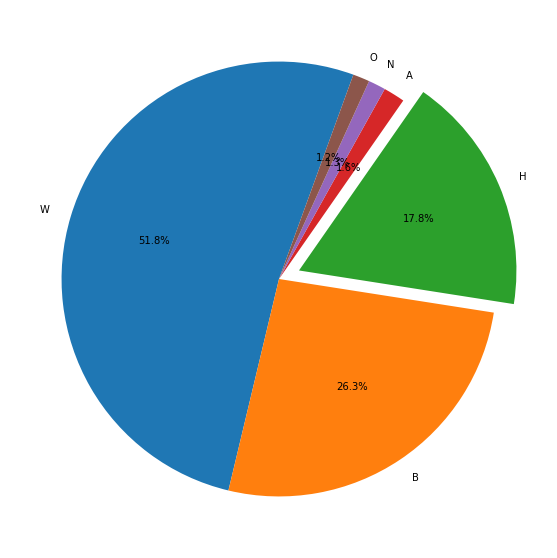

In [ ]:
# matplotlib



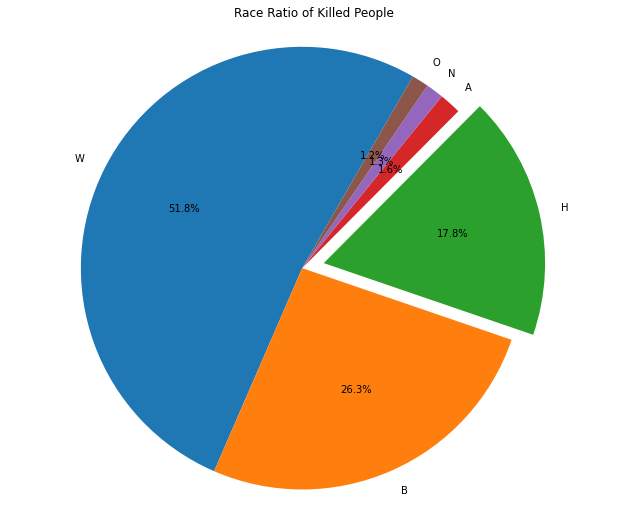

In [ ]:
import matplotlib.pyplot as plt

labels = df['race'].value_counts().index
values = df['race'].value_counts().values

explode=(0, 0, 0.1, 0, 0, 0)
fig = plt.figure(figsize=(11,9))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=60, explode=explode)
plt.title('Race Ratio of Killed People')
plt.axis('equal')
plt.show()

## 6: Most common 15 Name or Surname of killed people 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [48]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


(2254, 15)

In [49]:
df.shape

(2535, 14)

In [50]:
df['name'].value_counts()

TK TK                    49
TK Tk                     2
Eric Harris               2
Michael Brown             2
Brandon Jones             2
                         ..
Wendell King              1
Adrian Joseph Shaffer     1
James Monroe Barrett      1
Caleb J. Douglas          1
Billy Maine               1
Name: name, Length: 2481, dtype: int64

Daquan Antonio Westbrook    2
Michael Johnson             2
Eric Harris                 2
Michael Brown               2
Brandon Jones               2
                           ..
Wayne Donald Dorsey         1
Matthew Vincent Wood        1
Taylor Hodge                1
David L. Anderson           1
Jovany Martinez             1
Name: name, Length: 2249, dtype: int64

In [ ]:
names = df['name'].str.split()
# names = df.name.apply(lambda x: x.split())

In [ ]:
names.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [47]:
names.shape()

NameError: ignored

In [ ]:
df['name'].str.split(expand=True).rename(columns={0:'1st', 1:'2nd', 2:'3rd', 3:'4th'})

,1st,2nd,3rd,4th
0,Tim,Elliot,None,None
1,Lewis,Lee,Lembke,None
2,John,Paul,Quintero,None
3,Matthew,Hoffman,None,None
4,Michael,Rodriguez,None,None
...,...,...,...,...
2519,Aries,Clark,None,None
2523,Kesharn,K.,Burney,None
2525,Deltra,Henderson,None,None
2533,Isaiah,Tucker,None,None


In [ ]:
name_list = []
def func(x):
    for i in range(len(x)):
        name_list.append(x[i])

names.apply(func)

0       None
1       None
2       None
3       None
4       None
        ... 
2519    None
2523    None
2525    None
2533    None
2534    None
Name: name, Length: 2254, dtype: object

In [ ]:
name_dict = {}
def counter(namelist):
    for name in namelist:
        if name in name_dict.keys():
            name_dict[name] += 1
        else:
            name_dict[name] = 1
    return name_dict
counter(name_list)

{'Tim': 3,
 'Elliot': 1,
 'Lewis': 7,
 'Lee': 37,
 'Lembke': 1,
 'John': 36,
 'Paul': 16,
 'Quintero': 2,
 'Matthew': 22,
 'Hoffman': 2,
 'Michael': 82,
 'Rodriguez': 13,
 'Kenneth': 17,
 'Joe': 9,
 'Brown': 17,
 'Arnold': 2,
 'Buck': 3,
 'Brock': 2,
 'Nichols': 3,
 'Autumn': 1,
 'Steele': 1,
 'Leslie': 2,
 'Sapp': 2,
 'III': 9,
 'Patrick': 13,
 'Wetter': 1,
 'Ron': 2,
 'Sneed': 1,
 'Hashim': 1,
 'Hanif': 1,
 'Ibn': 1,
 'Abdul-Rasheed': 1,
 'Nicholas': 13,
 'Ryan': 16,
 'Brickman': 1,
 'Omarr': 1,
 'Julian': 3,
 'Maximillian': 1,
 'Jackson': 9,
 'Loren': 3,
 'Simpson': 4,
 'James': 47,
 'Dudley': 1,
 'Barker': 2,
 'Artago': 1,
 'Damon': 6,
 'Howard': 3,
 'Thomas': 24,
 'Hamby': 1,
 'Jimmy': 5,
 'Foreman': 1,
 'Andy': 1,
 'Martinez': 10,
 'Tommy': 3,
 'Smith': 31,
 'Brian': 9,
 'Barbosa': 1,
 'Salvador': 4,
 'Figueroa': 2,
 'Edward': 15,
 "O'Keefe": 1,
 'Richard': 33,
 'McClendon': 2,
 'Marcus': 4,
 'Golden': 1,
 'Goebel': 1,
 'Mario': 8,
 'Jordan': 5,
 'Talbot': 1,
 'Schroeder': 2,
 'R

In [ ]:
most_common= pd.DataFrame([name_dict]).T

In [ ]:
most_common.head()

,0
Tim,3
Elliot,1
Lewis,7
Lee,37
Lembke,1


In [ ]:
most_common.reset_index(inplace = True)

In [ ]:
most_common.columns=['name', 'name_frequency']

In [ ]:
most_common

,name,name_frequency
0,Tim,3
1,Elliot,1
2,Lewis,7
3,Lee,37
4,Lembke,1
...,...,...
2592,Aries,1
2593,Kesharn,1
2594,Burney,1
2595,Deltra,1


In [ ]:
most_common_15 = most_common.nlargest(15, 'name_frequency')

In [ ]:
most_common_15.head()

,name,name_frequency
10,Michael,82
142,David,53
41,James,47
70,Robert,44
204,Joseph,43


In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [ ]:
most_common[most_common['name'] == 'TK']

,name,name_frequency
2581,TK,2


In [ ]:
name_dict['TK']

2

In [ ]:
tk_index = most_common[most_common['name'] == 'TK'].index[0]

In [ ]:
tk_index

2581

In [ ]:
most_common.drop(tk_index, inplace=True)

In [ ]:
most_common[most_common['name'] == 'TK']

,name,name_frequency


In [ ]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

(2253,)

In [46]:
df.shape

(2535, 14)

['Tim', 'Elliot']

'Tim'

5339

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 37,
         'Lembke': 1,
         'John': 36,
         'Paul': 16,
         'Quintero': 2,
         'Matthew': 22,
         'Hoffman': 2,
         'Michael': 82,
         'Rodriguez': 13,
         'Kenneth': 17,
         'Joe': 9,
         'Brown': 17,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 1,
         'Leslie': 2,
         'Sapp': 2,
         'III': 9,
         'Patrick': 13,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 16,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 9,
         'Loren': 3,
         'Simpson': 4,
         'James': 47,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
     

[('Michael', 82),
 ('David', 53),
 ('James', 47),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('Lee', 37),
 ('John', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('Smith', 31),
 ('J.', 30),
 ('Johnson', 29),
 ('Joshua', 27)]

,name_or_surname_most_frequency,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


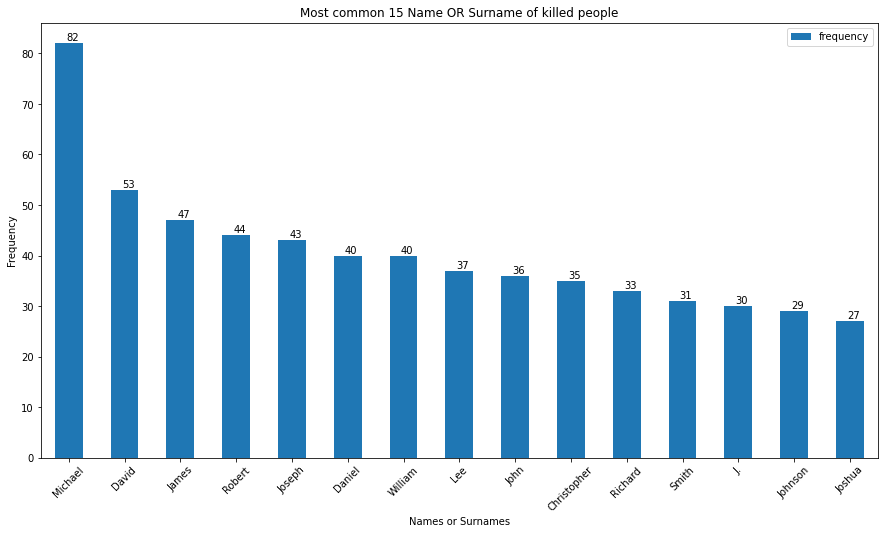

In [ ]:
# with pandas


In [ ]:
x = most_common_15.set_index('name').index
y = most_common_15.name_frequency

<Figure size 2500x1875 with 0 Axes>

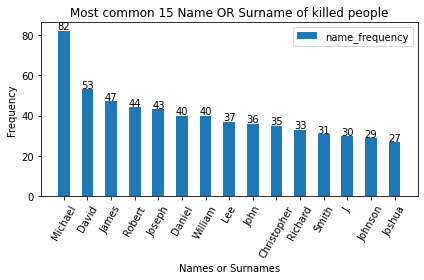

In [ ]:
plt.figure(figsize=(20, 15), dpi=125)

most_common_15.set_index('name').plot.bar(width=0.5)

plt.title("Most common 15 Name OR Surname of killed people", fontsize= 12, color="black")
plt.xlabel('Names or Surnames')
plt.ylabel('Frequency')

plt.xticks(rotation = 60)

plt.axis("tight")
plt.tight_layout()

for index, value in enumerate(y):
    plt.text(index, value+0.5, str(value), ha='center')

plt.show();
   

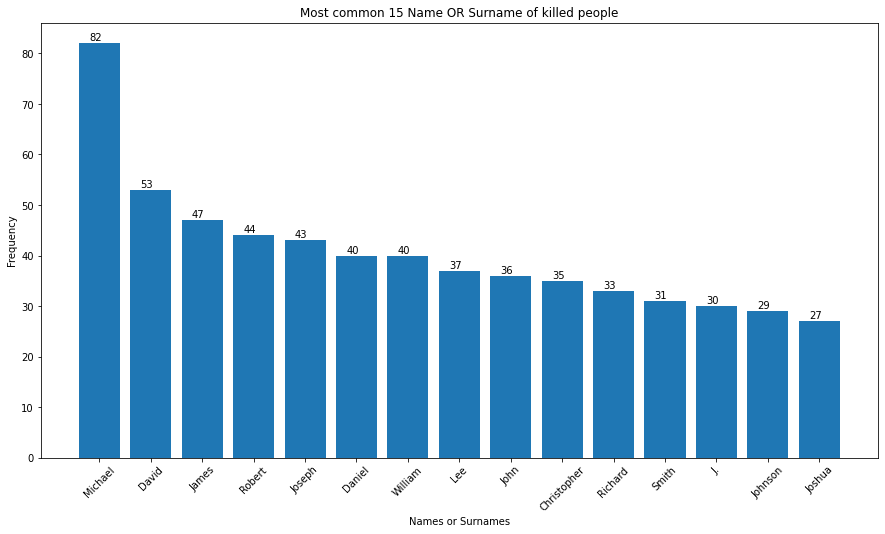

In [ ]:
# with matplotlib


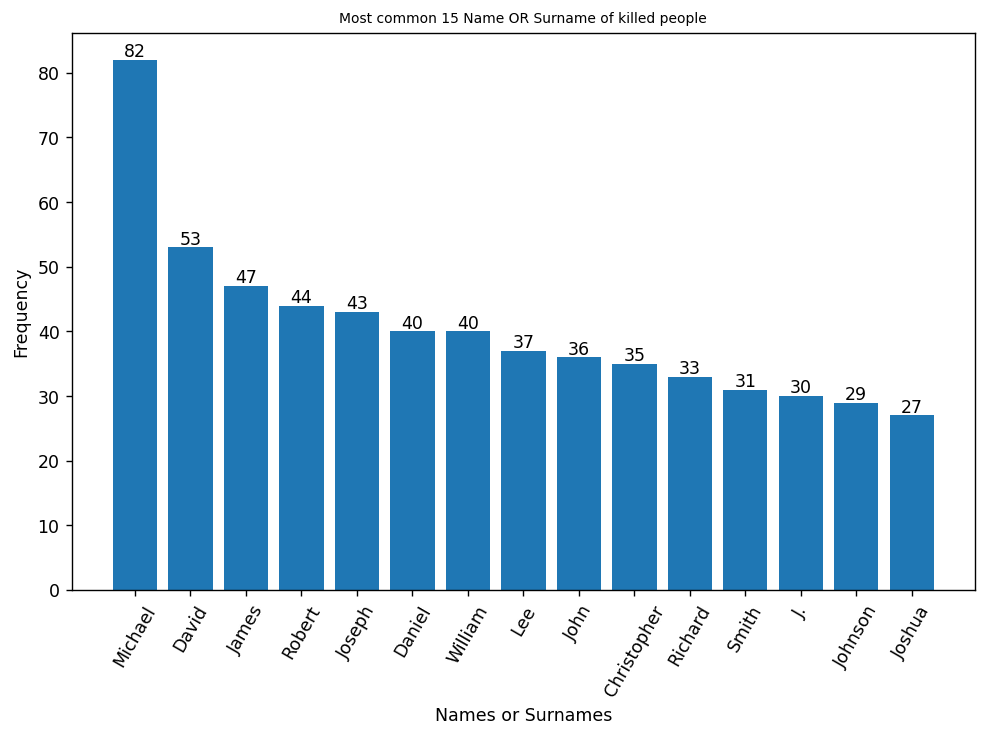

In [ ]:
fig, ax = plt.subplots(figsize= (8, 6), dpi=125)

ax.bar(x, y, width=0.8)

ax.set_title("Most common 15 Name OR Surname of killed people", fontsize= 8, color="black")
ax.set_xlabel('Names or Surnames')
ax.set_ylabel('Frequency')

plt.xticks(rotation = 60)
plt.tight_layout()
ax.axis("tight");

for index, value in enumerate(y):
    plt.text(index, value+0.5, str(value), ha='center');